In [58]:
from labcams import parseCamLog
import pylab as plt
import numpy as np
%matplotlib notebook
plt.matplotlib.style.use('ggplot')


fname  = '/mnt/churchland_nlsas_data/data/JC012/onephoton/JC012_SpatialSparrow_20200710_125702/JC012_SpatialSparrow_20200710_125702_2.camlog'
log,led,sync,comm = parseCamLog(fname,readTeensy=True)

## Plot the frame numbers for sync onset/offset and the frame colors for each frame

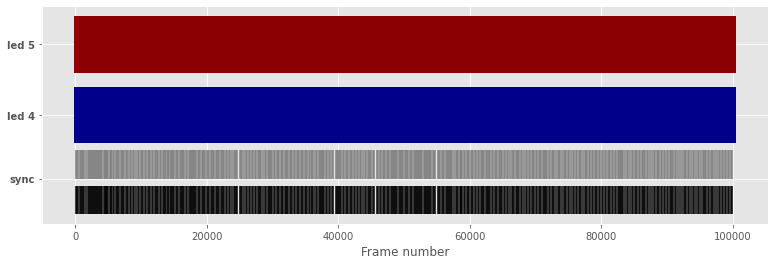

In [59]:
colors = ['darkblue','darkred','g','k']
# plot the LEDs and the syncs
plt.figure(figsize=[13,4])
plt.vlines(sync['frame'].iloc[::2],0,0.4,color = 'k')
plt.vlines(sync['frame'].iloc[::2],.5,0.9,color = 'gray')
ticks = [['sync',0.5]]
for i,l in enumerate(np.unique(led['led'])):
    plt.vlines(led['frame'][led['led']==l],i+1,i+1+0.8,color = colors[i])
    ticks.append(['led {0}'.format(l),i+1.4])
plt.yticks([t[-1] for t in ticks],[t[0] for t in ticks],fontweight='bold') 
plt.xlabel('Frame number');

## Check if the teensy missed a frame when using 2 channels

**Warning:** this is supposed to not work when going > 100Hz because the teensy communication to the computer is rate limited at 100Hz. 
 
 If there is noise in the camera to teensy line, you can use this to see where it occurs. 
 
* If there was noise in the teensy the frame counter should increase very fast and the frame count can be discontinuous.

* Here we plot the histogram to  see if there are any discontinuous frames.
* This is not normal and you should not record if there is noise. 

_These plots are for sanity check._

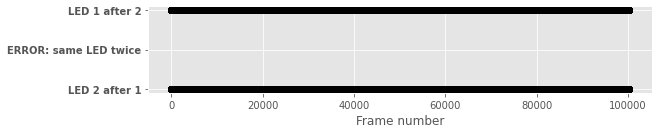

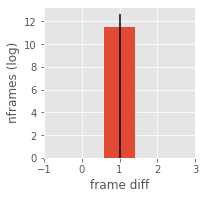

In [63]:
fig = plt.figure(figsize = [10,2])
fig.add_axes([.2,.3,.7,.6])
plt.plot(np.diff(led['led']),'ko',alpha=0.5)
plt.yticks([1,0,-1],['LED 1 after 2','ERROR: same LED twice','LED 2 after 1'],fontweight='bold')
plt.xlabel('Frame number')
# If there was noise in the teensy the frame counter should increase very fast and the frame count can be discontinuous.
# Here we plot the histogram to  see if there are any discontinuous frames.
fig = plt.figure(figsize = [3,3])
fig.add_axes([.2,.2,.7,.7])
d_frames = np.diff(led['frame'])
ed = np.arange(np.min(d_frames)-2,np.max(d_frames)+3,1)
C,ed = np.histogram(d_frames,ed)
import warnings
warnings.filterwarnings('ignore') # because of the log of zero
plt.bar(ed[:-1],np.log(C),width=0.8,alpha=1)
plt.vlines([1],0,np.log(np.max(C))*1.1)
plt.xticks(ed)
plt.xlabel('frame diff')
plt.ylabel('nframes (log)');

## Checking whether frames were missed by the recorder

This will plot difference between consecutive timestamps and the frame ids. 
In the case of the PCO camera (and most cameras) these are recorded from the camera itself.

The timestamps can be used to measure the accuracy of the camera clock.

The differance of consecutive frame IDs should be always 1 otherwise you likely are missing frames.


If the latter happens open an issue on git.

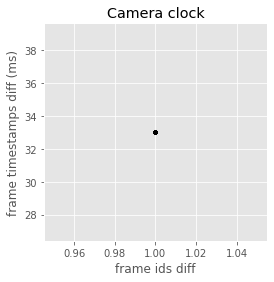

In [64]:
%matplotlib inline
plt.figure(figsize = [4,4])
interframeinterval = 1000*np.diff(log['timestamp'])
plt.plot(np.diff(log['frame_id']), interframeinterval,'ko',markersize=3,alpha = 0.2)
plt.ylim([0.8*np.min(interframeinterval),1.2*np.max(interframeinterval)])
plt.xlabel('frame ids diff')
plt.ylabel('frame timestamps diff (ms)')
plt.title('Camera clock');